In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from general_graph_utils import *

In [3]:
G_ud1 = nx.Graph()
G_ud1.add_nodes_from([1,2,3,4,5])
G_ud1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [36]:
G_d1 = nx.DiGraph()
G_d1.add_nodes_from([1,2,3,4,5])
G_d1.add_edge(1, 2, weight=1)
G_d1.add_edge(2, 1, weight=1)
G_d1.add_edge(2, 4, weight=1)
G_d1.add_edge(4, 2, weight=1)
G_d1.add_edge(2, 3, weight=1)
G_d1.add_edge(3, 2, weight=1)
G_d1.add_edge(3, 4, weight=1)
G_d1.add_edge(4, 3, weight=1)
G_d1.add_edge(1, 4, weight=1)
G_d1.add_edge(4, 1, weight=1)
G_d1.add_edge(5, 2, weight=1)
G_d1.add_edge(2, 5, weight=1)
G_d1.add_edge(5, 1, weight=1)
G_d1.add_edge(1, 5, weight=1)

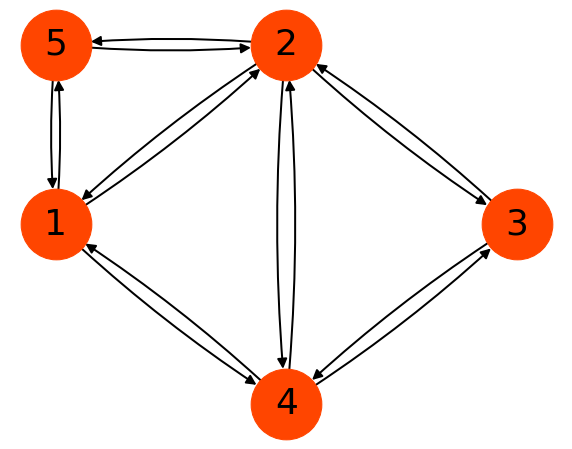

In [5]:
plt.rc("figure",figsize=(10,8))

pos = {2: (0,0), 4: (0, -4), 1:(-2, -2), 5: (-2, 0), 3: (2, -2)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_d1, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()

## Initialize in an equilibrium steady-state

In [37]:
edge_labels = nx.get_edge_attributes(G_d1, 'weight')
print(edge_labels)
label_list = list(edge_labels.values())
print(label_list)

{(1, 2): 1, (1, 4): 1, (1, 5): 1, (2, 1): 1, (2, 4): 1, (2, 3): 1, (2, 5): 1, (3, 2): 1, (3, 4): 1, (4, 2): 1, (4, 3): 1, (4, 1): 1, (5, 2): 1, (5, 1): 1}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [38]:
cycle_list = nx.cycle_basis(G_ud1)

In [39]:
cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,edge_labels)

In [40]:
affinities_f, affinities_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)

In [41]:
total_affinities = calculate_affinities(affinities_f, affinities_b, cycle_list)
print(total_affinities)

[0. 0. 0.]


## Compute autocorrelation functions

In [42]:
node_list = get_nodes(G_d1)
edge_list = get_edges(G_d1)

In [43]:
num_nodes = len(node_list)
num_edges = len(edge_list)

In [44]:
L = Laplacian_all(edge_list,label_list,num_nodes,num_edges)

In [45]:
L

array([[-3.,  1.,  0.,  1.,  1.],
       [ 1., -4.,  1.,  1.,  1.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 1.,  1.,  1., -3.,  0.],
       [ 1.,  1.,  0.,  0., -2.]])

In [46]:
observable = [3, 5, 7, 9, 11]
tau_n = np.around(np.arange(0.01,2.0,step=.01))

In [47]:
t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

In [48]:
total_areas = np.abs(np.trapz(t)-np.trapz(t_rev))
print(total_areas)

0.0


# Force area curve

In [49]:
print(num_nodes)
print(num_edges)
print(cycle_list)
print(edge_list)
print(label_list)
print(edge_labels)

5
14
[[2, 5, 1], [2, 4, 1], [2, 3, 4]]
[[1 2]
 [1 4]
 [1 5]
 [2 1]
 [2 4]
 [2 3]
 [2 5]
 [3 2]
 [3 4]
 [4 2]
 [4 3]
 [4 1]
 [5 2]
 [5 1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{(1, 2): 1, (1, 4): 1, (1, 5): 1, (2, 1): 1, (2, 4): 1, (2, 3): 1, (2, 5): 1, (3, 2): 1, (3, 4): 1, (4, 2): 1, (4, 3): 1, (4, 1): 1, (5, 2): 1, (5, 1): 1}


In [50]:
N = 3000
all_affinities = np.zeros((N,3))
all_areas = np.zeros(N)
all_affinities[0] = total_affinities
all_areas[0] = total_areas

In [51]:
observable = [3, 5, 7, 9, 11]
tau_n = np.around(np.arange(0.01,2.0,step=.01))

In [52]:
param_choice_index = np.random.choice(len(edge_list)-1)
param_choice = tuple(edge_list[param_choice_index])
param_choice_label = label_list[param_choice_index]

print(param_choice)
print(param_choice_label)

(4, 1)
1


In [53]:
for i in tqdm(range(1,N)):
    
    param_choice_label = param_choice_label * 1.01
    
    label_list[param_choice_index] = param_choice_label
    edge_labels[param_choice] = param_choice_label
    
    cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,edge_labels)
    affinities_f, affinities_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)
    total_affinities = calculate_affinities(affinities_f, affinities_b, cycle_list)
    all_affinities[i] = np.abs(total_affinities)
    
    L = Laplacian_all(edge_list,label_list,num_nodes,num_edges)
    t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)
    total_areas = np.abs(np.trapz(t)-np.trapz(t_rev))
    all_areas[i] = total_areas

100%|███████████████████████████████████████| 2999/2999 [02:37<00:00, 19.10it/s]


In [54]:
print(label_list)
print(edge_labels)
print(param_choice_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9115908852663.123, 1, 1]
{(1, 2): 1, (1, 4): 1, (1, 5): 1, (2, 1): 1, (2, 4): 1, (2, 3): 1, (2, 5): 1, (3, 2): 1, (3, 4): 1, (4, 2): 1, (4, 3): 1, (4, 1): 9115908852663.123, (5, 2): 1, (5, 1): 1}
9115908852663.123


In [55]:
#print(np.nonzero(all_affinities[1:,0]))
print(np.all(all_affinities[1:,0]))
#print(all_affinities[1:,0])

False


In [56]:
#print(np.nonzero(all_affinities[1:,1]))
print(np.all(all_affinities[1:,1]))
#print(all_affinities[1:,1])

True


In [57]:
#print(np.nonzero(all_affinities[1:,2]))
print(np.all(all_affinities[1:,2]))
#print(all_affinities[1:,2])

False


In [58]:
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

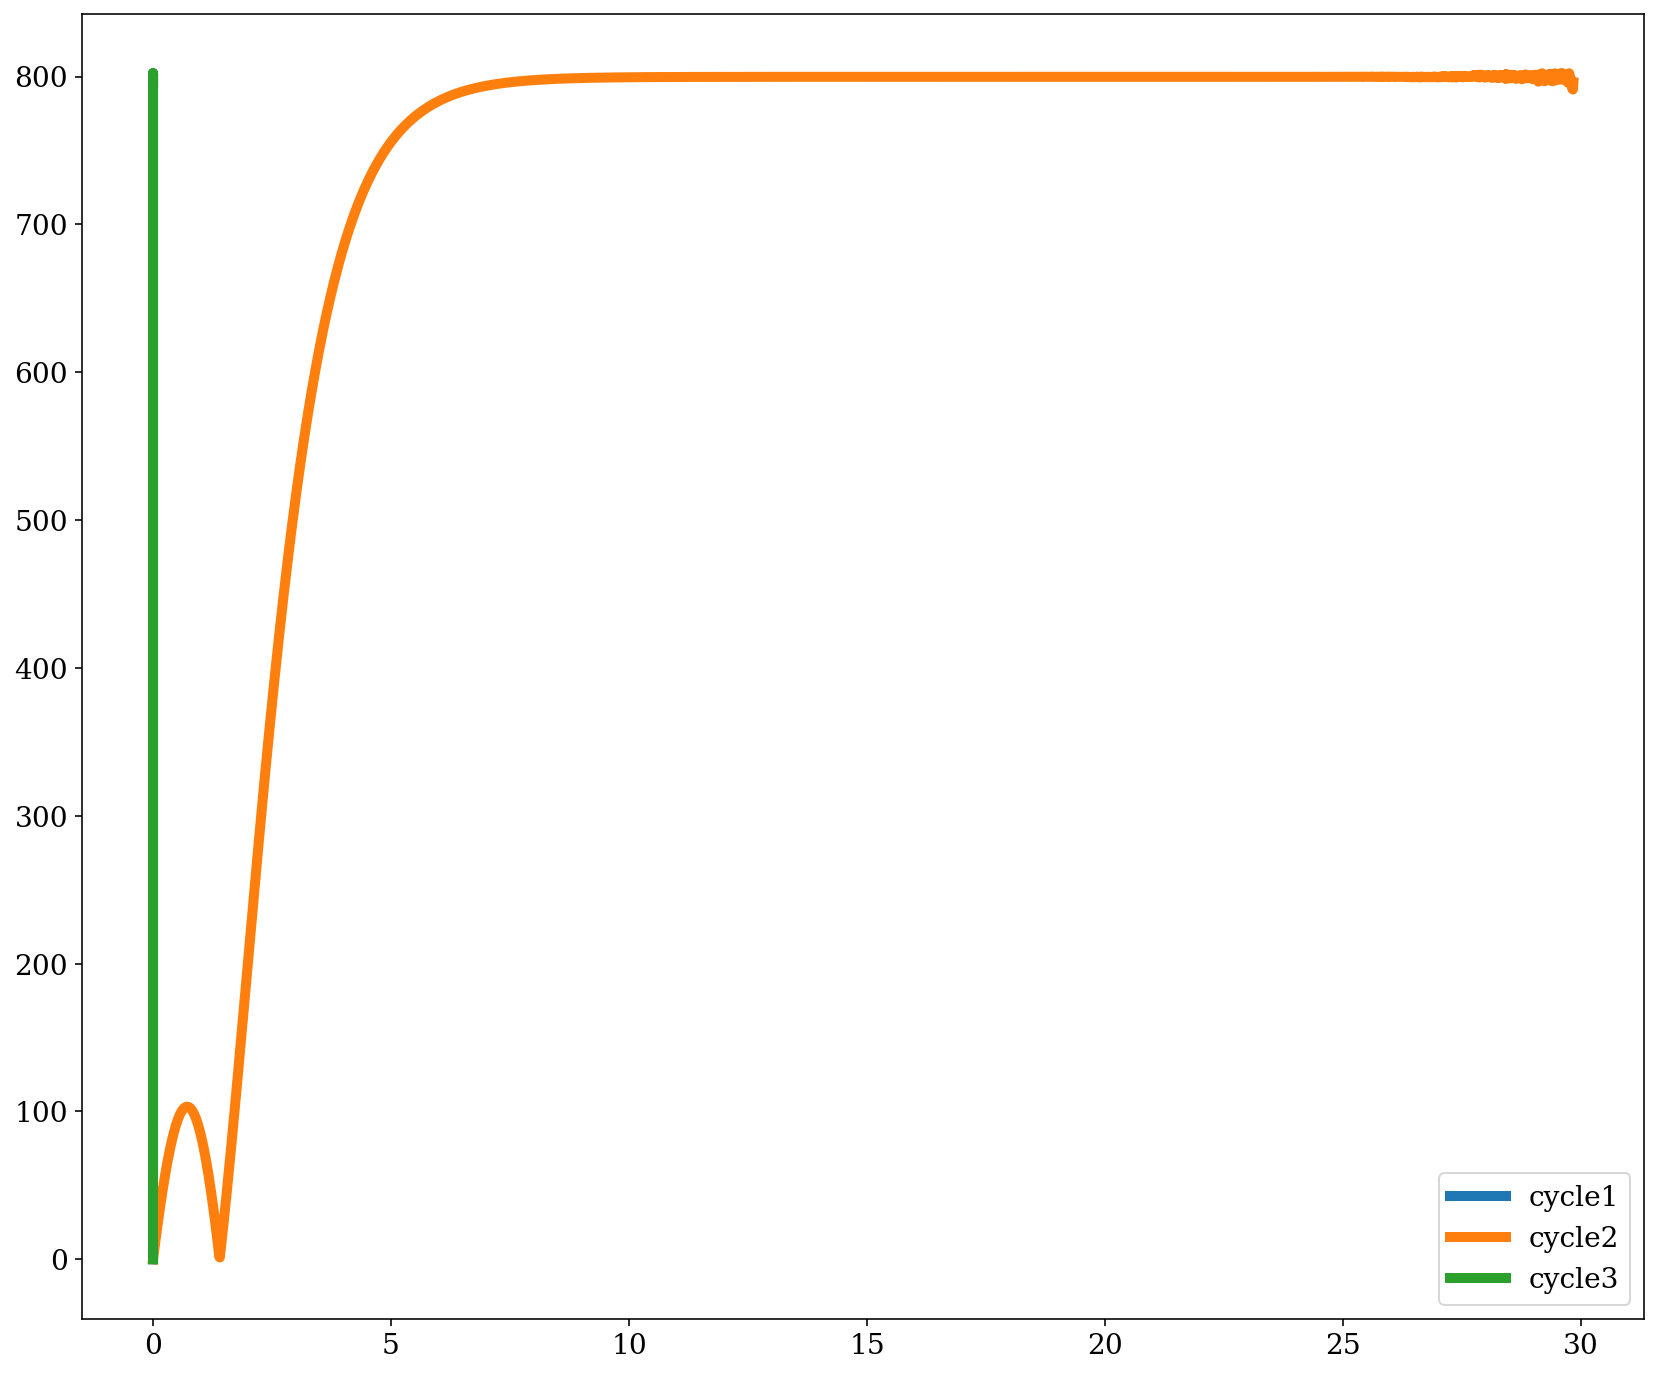

In [60]:
fig, ax = plt.subplots()
plt.plot(all_affinities[:,0],all_areas,linewidth=5,label='cycle1')
plt.plot(all_affinities[:,1],all_areas,linewidth=5,label='cycle2')
plt.plot(all_affinities[:,2],all_areas,linewidth=5,label='cycle3')
plt.legend()
fig.savefig('G_ex1_cycle1.png')

## Chose a random parameter

In [54]:
param_choice_index = np.random.choice(len(edge_list)-1)
param_choice = tuple(edge_list[param_choice_index])
param_choice_label = label_list[param_choice_index]

print(param_choice)
print(param_choice_label)

(2, 5)
1.0


## Perturb its value

In [55]:
param_choice_label = param_choice_label*1.01
print(param_choice_label)

1.01


## Change its value in relevant data structures

In [56]:
label_list[param_choice_index] = param_choice_label
print(label_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.01, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [58]:
edge_labels[param_choice] = param_choice_label
print(edge_labels)

{(1, 2): 1.0, (1, 4): 1.0, (1, 5): 1.0, (2, 1): 1.0, (2, 4): 1.0, (2, 3): 1.0, (2, 5): 1.01, (3, 2): 1.0, (3, 4): 1.0, (4, 2): 1.0, (4, 3): 1.0, (4, 1): 1.0, (5, 2): 1.0, (5, 1): 1.0}


## Calculate affinity and area

In [60]:
cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,edge_labels)

In [61]:
affinities_f, affinities_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)

In [62]:
total_affinities = calculate_affinities(affinities_f, affinities_b, cycle_list)
print(total_affinities)

[0.00995033 0.         0.        ]


In [63]:
L = Laplacian_all(edge_list,label_list,num_nodes,num_edges)

In [64]:
t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

In [66]:
total_areas = np.abs(np.trapz(t)-np.trapz(t_rev))
print(total_areas)

7.839676426607184


In [5]:
print(nx.minimum_cycle_basis(G_ud1))

[[1, 2, 4], [1, 2, 5], [2, 3, 4]]


In [371]:
print([sorted(c) for c in nx.minimum_cycle_basis(G_ud1)])

[[1, 2, 4], [1, 2, 5], [2, 3, 4]]


In [372]:
print(nx.cycle_basis(G_ud1,2))

[[1, 5, 2], [4, 3, 2], [1, 4, 2]]


In [373]:
lists = nx.cycle_basis(G_ud1)
print(lists)

[[2, 5, 1], [2, 4, 1], [2, 3, 4]]


In [374]:
lists

[[2, 5, 1], [2, 4, 1], [2, 3, 4]]

In [375]:
nx.is_weighted(G_d1)

False

In [376]:
edge_tracker = []

for item in lists:
    
    forwards = np.array([])
    reverses = np.array([])
    
    for i in range(0,len(item)):
        
        print(edge_tracker)
        
        #if it's not the last item in the list
        if item[i] != item[-1]:
            
            # label the source and target nodes
            j = item[i]
            k = item[i+1]
            
            print('regular:')
            print(j,k)
            print(k,j)
            
            # if this pair of edges already have labels, add them to the forward/reverse list
            if nx.is_weighted(G_d1, (j,k)) == True:
                forwards = np.append(forwards, G_d1.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d1.get_edge_data(k,j)['weight'])
                print('in edge-tracker:')
                print((j,k))
                print(G_d1.get_edge_data(j,k)['weight'])
                print(G_d1.get_edge_data(k,j)['weight'])
            
            # if not, sample their values logarithmically and add them to the forward/reverse list
            elif nx.is_weighted(G_d1, (j,k)) == False:
                print('not in edge-tracker:')
                G_d1[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                G_d1[k][j]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                forwards = np.append(forwards, G_d1.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d1.get_edge_data(k,j)['weight'])
                edge_tracker.append((j, k))
                edge_tracker.append((k, j))
        
        # if it's the last item in the list
        elif item[i] == item[-1]:
            
            # label source and target nodes differently
            j = item[-1]
            k = item[0]
            
            print('irregular:')
            print(j,k)
            print(k,j)
            
            # if this pair of edges already have labels, add them to the forward/reverse list
            if nx.is_weighted(G_d1, (j,k)) == True:
                forwards = np.append(forwards, G_d1.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d1.get_edge_data(k,j)['weight'])
                
                # choose an edge from this cycle that was not involved in a previous cycle
                index = np.random.choice((0,len(edge_tracker)-1),1)[0]
                backcalculate = edge_tracker[index]
                w = backcalculate[0]
                x = backcalculate[1]
                
                # maybe this calculation is incorrect somehow
                # ... and backcalculate its value from the cycle condition
                if (index % 2) == 0:
                    G_d1[x][w]['weight'] = np.prod(reverses)/np.prod(forwards)
                    forwards = np.append(forwards, G_d1.get_edge_data(x,w)['weight'])
                else:
                    G_d1[w][x]['weight'] = np.prod(forwards)/np.prod(reverses)
                    forwards = np.append(forwards, G_d1.get_edge_data(w,x)['weight'])
                print('in edge-tracker:')
                print((j,k))
                print(G_d1.get_edge_data(j,k)['weight'])
                print(G_d1.get_edge_data(k,j)['weight'])
                
            # if not...
            if nx.is_weighted(G_d1, (j,k)) == False:
                
                edge_tracker.append((j, k))
                edge_tracker.append((k, j))
                
                # ... sample one value logarithmically and add it to the forward list...
                G_d1[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                forwards = np.append(forwards, G_d1.get_edge_data(j,k)['weight'])
                
                # ... while backcalculating the other from the cycle condition and adding it to the reverse list
                G_d1[k][j]['weight'] = np.prod(forwards)/np.prod(reverses)
                reverses = np.append(reverses, G_d1.get_edge_data(k,j)['weight'])
                
                print('not in edge-tracker:')
                print(nx.is_weighted(G_d1, (j,k)))
                print(nx.is_weighted(G_d1, (k,j)))
        print(np.prod(forwards)/np.prod(reverses))
                

[]
regular:
2 5
5 2
not in edge-tracker:
0.029507647920344382
[(2, 5), (5, 2)]
regular:
5 1
1 5
not in edge-tracker:
96.32252417125245
[(2, 5), (5, 2), (5, 1), (1, 5)]
irregular:
1 2
2 1
not in edge-tracker:
True
True
1.0
[(2, 5), (5, 2), (5, 1), (1, 5), (1, 2), (2, 1)]
regular:
2 4
4 2
not in edge-tracker:
0.001625475970345157
[(2, 5), (5, 2), (5, 1), (1, 5), (1, 2), (2, 1), (2, 4), (4, 2)]
regular:
4 1
1 4
not in edge-tracker:
7.181564736199551e-06
[(2, 5), (5, 2), (5, 1), (1, 5), (1, 2), (2, 1), (2, 4), (4, 2), (4, 1), (1, 4)]
irregular:
1 2
2 1
in edge-tracker:
(1, 2)
0.22583252664869172
21.752759006773623
1.0
[(2, 5), (5, 2), (5, 1), (1, 5), (1, 2), (2, 1), (2, 4), (4, 2), (4, 1), (1, 4)]
regular:
2 3
3 2
not in edge-tracker:
0.005109220076607029
[(2, 5), (5, 2), (5, 1), (1, 5), (1, 2), (2, 1), (2, 4), (4, 2), (4, 1), (1, 4), (2, 3), (3, 2)]
regular:
3 4
4 3
not in edge-tracker:
0.07001283059486246
[(2, 5), (5, 2), (5, 1), (1, 5), (1, 2), (2, 1), (2, 4), (4, 2), (4, 1), (1, 4), (2

In [378]:
        #print(item)
        #print(forwards)
        #print(reverses)
        #print(edge_tracker)
        #print(np.prod(forwards)/np.prod(reverses))
        print(nx.get_edge_attributes(G_d1,'weight'))

{(1, 2): 0.22583252664869172, (1, 4): 171.50337659432358, (1, 5): 0.004528545638785937, (2, 1): 21.752759006773623, (2, 4): 0.46425134485398684, (2, 3): 0.04004489677130014, (2, 5): 5.84884266908497, (3, 2): 7.8377709652103045, (3, 4): 1.5581466777307607, (4, 2): 285.60947889952917, (4, 3): 0.11370650522941028, (4, 1): 0.7577242752025498, (5, 2): 0.023216829780117965, (5, 1): 14.782640349040989}


In [380]:
weight_dict = nx.get_edge_attributes(G_d1,'weight')

In [381]:
cycle_list = nx.cycle_basis(G_ud1)
cycle_list

[[2, 5, 1], [2, 4, 1], [2, 3, 4]]

In [382]:
from general_graph_utils import *

In [383]:
cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,weight_dict)

In [384]:
affinities_f, affinities_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)

In [385]:
total_affinities = calculate_affinities(affinities_f, affinities_b, cycle_list)

In [386]:
total_affinities

array([  9.05222745, -16.41169546,   3.76287784])

In [387]:
edge_tracker

[(2, 5),
 (5, 2),
 (5, 1),
 (1, 5),
 (1, 2),
 (2, 1),
 (2, 4),
 (4, 2),
 (4, 1),
 (1, 4),
 (2, 3),
 (3, 2),
 (3, 4),
 (4, 3)]

In [89]:
edge_tracker[0]

(2, 3)

In [67]:
index = np.random.choice((0,len(edge_tracker)-1),1)[0]
index

3

In [68]:
backcalculate = edge_tracker[index]
backcalculate

(1, 5)

In [69]:
index

3

In [400]:
for item in lists:
    forwards = np.array([])
    reverses = np.array([])
    edge_tracker = []
        
    for i in range(0,len(item)):

        #if it's not the last item in the list
        if item[i] != item[-1]:
            # label the source and target nodes
            j = item[i]
            k = item[i+1]

            # if this pair of edges already have labels, add them to the forward/reverse list
            if nx.is_weighted(G_d, (j,k)) == True:
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])

            # if not, sample their values logarithmically and add them to the forward/reverse list
            elif nx.is_weighted(G_d, (j,k)) == False:
                G_d[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                G_d[k][j]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                edge_tracker.append((j, k))
                edge_tracker.append((k, j))

        # if it's the last item in the list
        elif item[i] == item[-1]:

            # label source and target nodes differently
            j = item[-1]
            k = item[0]

            # if this pair of edges already have labels, add them to the forward/reverse list
            if nx.is_weighted(G_d, (j,k)) == True:
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])

                # choose an edge from this cycle that was not involved in a previous cycle
                index = np.random.choice((0,len(edge_tracker)-1),1)[0]
                backcalculate = edge_tracker[index]
                w = backcalculate[0]
                x = backcalculate[1]

                # ... and backcalculate its value from the cycle condition
                if (index % 2) == 0:
                    G_d[x][w]['weight'] = np.prod(reverses)/np.prod(forwards)
                    forwards = np.append(forwards, G_d.get_edge_data(x,w)['weight'])
                else:
                    G_d[w][x]['weight'] = np.prod(forwards)/np.prod(reverses)
                    forwards = np.append(forwards, G_d.get_edge_data(w,x)['weight'])

            # if not...
            if nx.is_weighted(G_d, (j,k)) == False:
                # ... sample one value logarithmically and add it to the forward list...
                G_d[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                # ... while backcalculating the other from the cycle condition and adding it to the reverse list
                G_d[k][j]['weight'] = np.prod(forwards)/np.prod(reverses)
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                edge_tracker.append((j, k))
                edge_tracker.append((k, j))

            return G_d

In [426]:
G = nx.Graph()
nx.add_cycle(G,[0,1,2,3])
nx.add_cycle(G,[0,3,4,5])
G.add_edges_from([(2,1),(3,2),(4,3),(1,0),(5,4),(0,5)])

In [427]:
G_d = nx.DiGraph()
nx.add_cycle(G_d,[0,1,2,3])
nx.add_cycle(G_d,[0,3,4,5])
G_d.add_edges_from([(2,1),(3,2),(4,3),(1,0),(5,4),(0,5)])

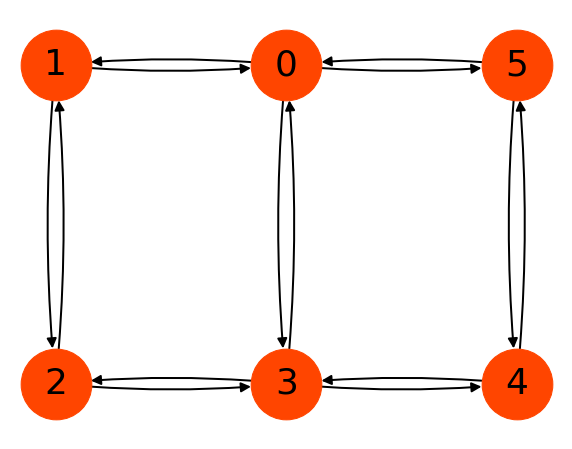

In [428]:
plt.rc("figure",figsize=(10,8))

pos = {0: (0,0), 1: (-2, 0), 2:(-2, -1), 3: (0, -1), 4: (2, -1), 5: (2,0)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_d, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()

In [429]:
lists = nx.cycle_basis(G)
print(lists)

[[3, 4, 5, 0], [1, 2, 3, 0]]


In [430]:
for item in lists:
    forwards = np.array([])
    reverses = np.array([])
    edge_tracker = []
    for i in range(0,len(item)):
        #if it's not the last item in the list
        if item[i] != item[-1]:
            # label the source and target nodes
            j = item[i]
            k = item[i+1]
            # if this pair of edges already have labels, add them to the forward/reverse list
            if nx.is_weighted(G_d, (j,k)) == True:
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
            # if not, sample their values logarithmically and add them to the forward/reverse list
            elif nx.is_weighted(G_d, (j,k)) == False:
                G_d[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                G_d[k][j]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                edge_tracker.append((j, k))
                edge_tracker.append((k, j))
        # if it's the last item in the list
        elif item[i] == item[-1]:
            # label source and target nodes differently
            j = item[-1]
            k = item[0]
            # if this pair of edges already have labels, add them to the forward/reverse list
            if nx.is_weighted(G_d, (j,k)) == True:
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                # choose an edge from this cycle that was not involved in a previous cycle
                index = np.random.choice((0,len(edge_tracker)-1),1)[0]
                backcalculate = edge_tracker[index]
                w = backcalculate[0]
                x = backcalculate[1]
                # ... and backcalculate its value from the cycle condition
                if (index % 2) == 0:
                    G_d[x][w]['weight'] = np.prod(reverses)/np.prod(forwards)
                    forwards = np.append(forwards, G_d.get_edge_data(x,w)['weight'])
                else:
                    G_d[w][x]['weight'] = np.prod(forwards)/np.prod(reverses)
                    forwards = np.append(forwards, G_d.get_edge_data(w,x)['weight'])
            # if not...
            if nx.is_weighted(G_d, (j,k)) == False:
                # ... sample one value logarithmically and add it to the forward list...
                G_d[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                # ... while backcalculating the other from the cycle condition and adding it to the reverse list
                G_d[k][j]['weight'] = np.prod(forwards)/np.prod(reverses)
                reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                edge_tracker.append((j, k))
                edge_tracker.append((k, j))
        print(item)
        print(forwards)
        print(reverses)
        print(edge_tracker)
        print(np.prod(forwards)/np.prod(reverses))
        print(nx.get_edge_attributes(G_d,'weight'))

[3, 4, 5, 0]
[0.00121578]
[514.39910785]
[(3, 4), (4, 3)]
2.3634906442708475e-06
{(3, 4): 0.001215777478832566, (4, 3): 514.3991078533088}
[3, 4, 5, 0]
[1.21577748e-03 1.12781134e+02]
[514.39910785 247.82370518]
[(3, 4), (4, 3), (4, 5), (5, 4)]
1.075591839111697e-06
{(3, 4): 0.001215777478832566, (4, 5): 112.78113390205678, (4, 3): 514.3991078533088, (5, 4): 247.82370517789673}
[3, 4, 5, 0]
[1.21577748e-03 1.12781134e+02 6.36120759e+00]
[5.14399108e+02 2.47823705e+02 4.07837493e-03]
[(3, 4), (4, 3), (4, 5), (5, 4), (5, 0), (0, 5)]
0.001677644424458173
{(0, 5): 0.004078374932349054, (3, 4): 0.001215777478832566, (4, 5): 112.78113390205678, (4, 3): 514.3991078533088, (5, 0): 6.361207585728847, (5, 4): 247.82370517789673}
[3, 4, 5, 0]
[1.21577748e-03 1.12781134e+02 6.36120759e+00 1.47985004e-02]
[5.14399108e+02 2.47823705e+02 4.07837493e-03 2.48266216e-05]
[(3, 4), (4, 3), (4, 5), (5, 4), (5, 0), (0, 5), (0, 3), (3, 0)]
1.0
{(0, 3): 0.014798500351116635, (0, 5): 0.004078374932349054, (3, 

In [431]:
nx.get_edge_attributes(G_d,'weight')

{(0, 1): 0.011020915648480087,
 (0, 3): 0.014798500351116635,
 (0, 5): 0.004078374932349054,
 (1, 2): 81.97099866007832,
 (1, 0): 13408.297156344819,
 (2, 3): 336.59919697969957,
 (2, 1): 0.0038836486522885014,
 (3, 0): 2.4826621604393137e-05,
 (3, 4): 0.001215777478832566,
 (3, 2): 0.00979664427320672,
 (4, 5): 112.78113390205678,
 (4, 3): 514.3991078533088,
 (5, 0): 6.361207585728847,
 (5, 4): 247.82370517789673}

In [432]:
print(edge_tracker)

[(1, 2), (2, 1), (2, 3), (3, 2), (0, 1), (1, 0)]


In [433]:
def equilibrium_multicycle(G_d,lists):
    for item in lists:
        forwards = np.array([])
        reverses = np.array([])
        edge_tracker = []
        for i in range(0,len(item)):
            #if it's not the last item in the list
            if item[i] != item[-1]:
                # label the source and target nodes
                j = item[i]
                k = item[i+1]
                # if this pair of edges already have labels, add them to the forward/reverse list
                if nx.is_weighted(G_d, (j,k)) == True:
                    forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                    reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                # if not, sample their values logarithmically and add them to the forward/reverse list
                elif nx.is_weighted(G_d, (j,k)) == False:
                    G_d[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                    G_d[k][j]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                    forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                    reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                    edge_tracker.append((j, k))
                    edge_tracker.append((k, j))
            # if it's the last item in the list
            elif item[i] == item[-1]:
                # label source and target nodes differently
                j = item[-1]
                k = item[0]
                # if this pair of edges already have labels, add them to the forward/reverse list
                if nx.is_weighted(G_d, (j,k)) == True:
                    forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                    reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                    # choose an edge from this cycle that was not involved in a previous cycle
                    index = np.random.choice((0,len(edge_tracker)-1),1)[0]
                    backcalculate = edge_tracker[index]
                    w = backcalculate[0]
                    x = backcalculate[1]
                    # ... and backcalculate its value from the cycle condition
                    if (index % 2) == 0:
                        G_d[x][w]['weight'] = np.prod(reverses)/np.prod(forwards)
                        forwards = np.append(forwards, G_d.get_edge_data(x,w)['weight'])
                    else:
                        G_d[w][x]['weight'] = np.prod(forwards)/np.prod(reverses)
                        forwards = np.append(forwards, G_d.get_edge_data(w,x)['weight'])
                # if not...
                if nx.is_weighted(G_d, (j,k)) == False:
                    # ... sample one value logarithmically and add it to the forward list...
                    G_d[j][k]['weight'] = 10**(np.random.uniform(-3,3, size = 1)[0])
                    forwards = np.append(forwards, G_d.get_edge_data(j,k)['weight'])
                    # ... while backcalculating the other from the cycle condition and adding it to the reverse list
                    G_d[k][j]['weight'] = np.prod(forwards)/np.prod(reverses)
                    reverses = np.append(reverses, G_d.get_edge_data(k,j)['weight'])
                    edge_tracker.append((j, k))
                    edge_tracker.append((k, j))
    return G_d

In [434]:
G = nx.Graph()
nx.add_cycle(G,[0,1,2,3])
nx.add_cycle(G,[0,3,4,5])
G.add_edges_from([(2,1),(3,2),(4,3),(1,0),(5,4),(0,5)])

In [435]:
G_d = nx.DiGraph()
nx.add_cycle(G_d,[0,1,2,3])
nx.add_cycle(G_d,[0,3,4,5])
G_d.add_edges_from([(2,1),(3,2),(4,3),(1,0),(5,4),(0,5)])

In [436]:
G_d = equilibrium_multicycle(G_d,lists)

In [437]:
nx.get_edge_attributes(G_d,'weight')

{(0, 1): 0.03812552230346009,
 (0, 3): 12.798901089866721,
 (0, 5): 5.330027899037543,
 (1, 2): 49.6120352715606,
 (1, 0): 0.1836616593747947,
 (2, 3): 0.016259570133937543,
 (2, 1): 207.240343137797,
 (3, 0): 20308.709884089618,
 (3, 4): 0.5256513057084757,
 (3, 2): 1.2821202269015348,
 (4, 5): 248.795357486551,
 (4, 3): 0.04725455335546113,
 (5, 0): 714.8698190332609,
 (5, 4): 233.9290645251118}

In [438]:
G_ud1 = nx.Graph()
G_ud1.add_nodes_from([1,2,3,4,5])
G_ud1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [439]:
G_d1 = nx.DiGraph()
G_d1.add_nodes_from([1,2,3,4,5])
G_d1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [440]:
lists = nx.cycle_basis(G_ud1)

In [450]:
print(lists)

[[2, 5, 1], [2, 4, 1], [2, 3, 4]]


In [441]:
G_d1 = equilibrium_multicycle(G_d1,lists)

In [444]:
weight_dict = nx.get_edge_attributes(G_d1,'weight')

In [449]:
weight_dict.keys()

dict_keys([(1, 2), (1, 4), (1, 5), (2, 1), (2, 4), (2, 3), (2, 5), (3, 2), (3, 4), (4, 2), (4, 3), (4, 1), (5, 2), (5, 1)])

In [446]:
weight_dict.values()

dict_values([0.02339085075250591, 73.6622373260982, 0.0016097024728956764, 0.6343013428400419, 0.558227522330106, 381.39678528382007, 691.2678963233221, 0.01737077714830579, 705.1051568312754, 5.014080339500679, 5345831.471319168, 284.4399557052048, 274.5723376075926, 0.017338264236613575])

In [457]:
G_ex2 = nx.DiGraph()
G_ex2.add_nodes_from([1,2,3,4,5])
G_ex2.add_edges_from([(1,2), (2,1), (2,4), (4,2), (2,3), (3,2), (3,5), (5,3), (1,4), (4,1),(5,2),(2,5)])

In [458]:
G_ud2 = nx.Graph()
G_ud2.add_nodes_from([1,2,3,4,5])
G_ud2.add_edges_from([(1,2), (2,1), (2,4), (4,2), (2,3), (3,2), (3,5), (5,3), (1,4), (4,1),(5,2),(2,5)])

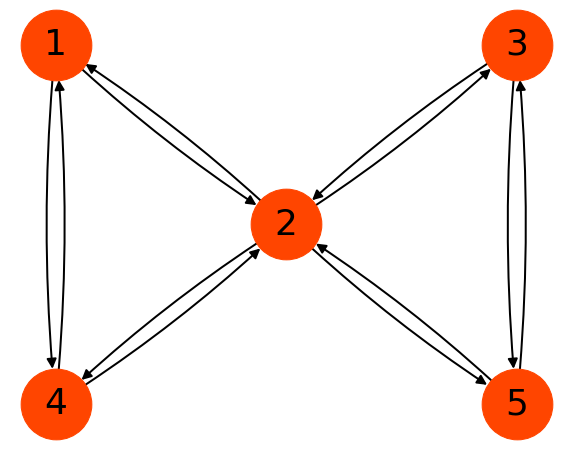

In [460]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-2, 0), 2:(0, -1), 4: (-2, -2), 5: (2, -2), 3: (2,0)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex2, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()

In [461]:
lists = nx.cycle_basis(G_ud2)

In [462]:
G_d2 = equilibrium_multicycle(G_ex2,lists)

In [464]:
nx.get_edge_attributes(G_d2,'weight')

{(1, 2): 126.77762811993775,
 (1, 4): 4.667944742836199,
 (2, 1): 0.00015129015446914965,
 (2, 4): 0.04934699960822314,
 (2, 3): 0.07205064760578633,
 (2, 5): 0.008869080007710674,
 (3, 2): 0.018596992249703646,
 (3, 5): 4.599387266266919,
 (4, 2): 368.4890966402399,
 (4, 1): 0.041596581462714007,
 (5, 3): 3.0227884824298124,
 (5, 2): 0.001504496474291433}

In [471]:
G_ex3 = nx.DiGraph()
G_ex3.add_nodes_from([1,2,3,4])
G_ex3.add_edges_from([(1,2), (2,1), (3,4), (4,3), (2,3), (3,2), (1,4), (4,1)])

In [472]:
G_ud3 = nx.Graph()
G_ud3.add_nodes_from([1,2,3,4])
G_ud3.add_edges_from([(1,2), (2,1), (3,4), (4,3), (2,3), (3,2), (1,4), (4,1)])

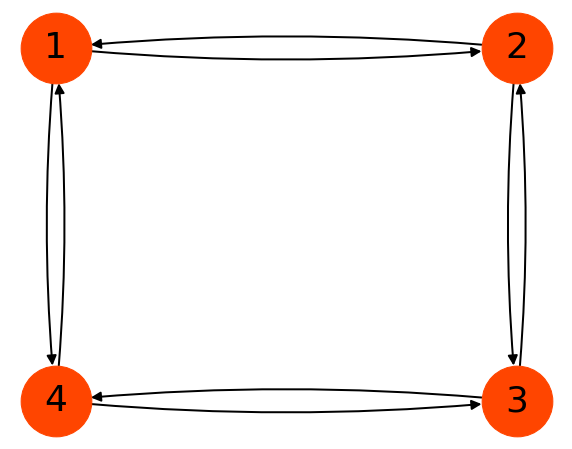

In [480]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-2, 0), 2:(0, 0), 4: (-2, -2), 3: (0,-2)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex3, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()

In [482]:
lists = nx.cycle_basis(G_ud3)

In [483]:
G_d3 = equilibrium_multicycle(G_ex3,lists)

In [484]:
nx.get_edge_attributes(G_d3,'weight')

{(1, 2): 0.014066984632323169,
 (1, 4): 1.364475991536443,
 (2, 1): 0.0005174656651439557,
 (2, 3): 0.0034404260461315325,
 (3, 4): 0.7235022008008041,
 (3, 2): 0.07184262328548335,
 (4, 3): 0.00893056330700711,
 (4, 1): 0.012937649350096208}

In [477]:
G_ex4 = nx.DiGraph()
G_ex4.add_nodes_from([1,2,3,4])
G_ex4.add_edges_from([(1,2), (2,1), (4,2),(2,4),(3,4), (4,3), (2,3), (3,2), (1,4), (4,1)])

In [478]:
G_ud4 = nx.Graph()
G_ud4.add_nodes_from([1,2,3,4])
G_ud4.add_edges_from([(1,2), (2,1), (4,2),(2,4),(3,4), (4,3), (2,3), (3,2), (1,4), (4,1)])

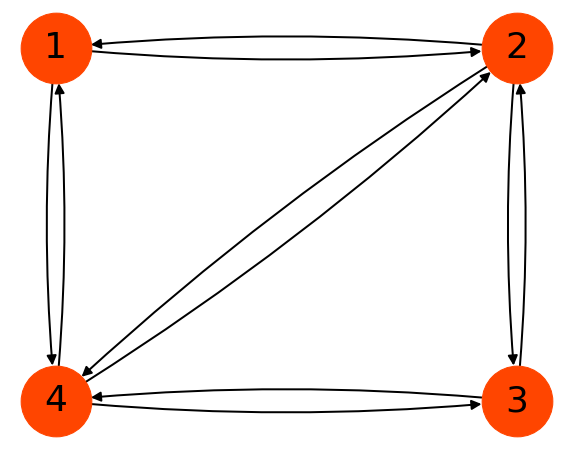

In [479]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-2, 0), 2:(0, 0), 4: (-2, -2), 3: (0,-2)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex4, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()

In [486]:
lists = nx.cycle_basis(G_ud4)

In [487]:
G_d4 = equilibrium_multicycle(G_ex4,lists)

In [488]:
nx.get_edge_attributes(G_d4,'weight')

{(1, 2): 0.004099490786145282,
 (1, 4): 1.725664006917775,
 (2, 1): 64.2016002980971,
 (2, 4): 0.3956354358749145,
 (2, 3): 0.0038677417250383927,
 (3, 4): 6.140132943307677,
 (3, 2): 0.1818934585465075,
 (4, 2): 0.0010832499652119877,
 (4, 3): 2.7413646256967174e-05,
 (4, 1): 73.995563253276}

In [489]:
G_ex5 = nx.DiGraph()
G_ex5.add_nodes_from([1,2,3,4,5,6,7])
G_ex5.add_edges_from([(1,2), (2,1), (1,3), (3,1), (2,4), (4,2), (4,3), (3,4), (3,6), (6,3), (5,4), (4,5),(5,2),(2,5), (4,6), (6,4), (5,7), (7,5),(6,7),(7,6)])

In [490]:
G_ud5 = nx.Graph()
G_ud5.add_nodes_from([1,2,3,4,5,6,7])
G_ud5.add_edges_from([(1,2), (2,1), (1,3), (3,1), (2,4), (4,2), (4,3), (3,4), (3,6), (6,3), (5,4), (4,5),(5,2),(2,5), (4,6), (6,4), (5,7), (7,5),(6,7),(7,6)])

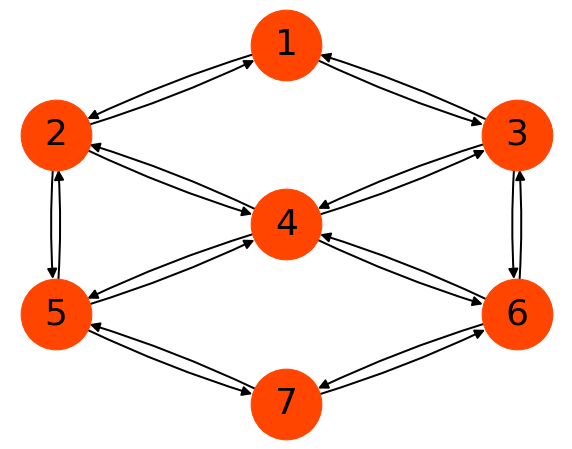

In [491]:
plt.rc("figure",figsize=(10,8))

pos = {1: (0, 5), 2:(-2, 3), 3: (2,3), 4: (0, 1), 5: (-2, -1), 6:(2, -1), 7:(0,-3)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "orangered",
    "edge_color": "black",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex5, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()

In [492]:
lists = nx.cycle_basis(G_ud5)

In [493]:
G_d5 = equilibrium_multicycle(G_ex5,lists)

In [494]:
nx.get_edge_attributes(G_d5,'weight')

{(1, 2): 1.033478768623764,
 (1, 3): 10.465382063652402,
 (2, 1): 2.6284452082330753e-06,
 (2, 4): 5.537199690001097,
 (2, 5): 0.019305017213825278,
 (3, 1): 460.17264358794773,
 (3, 4): 10.194754833738525,
 (3, 6): 229.11536910990966,
 (4, 2): 0.0002795620205797338,
 (4, 3): 0.0001705707115272606,
 (4, 5): 0.002500072329246979,
 (4, 6): 0.02098284268211981,
 (5, 4): 2865.472490043228,
 (5, 2): 0.00108542000560486,
 (5, 7): 0.0017239714074816052,
 (6, 3): 0.05947125865472692,
 (6, 4): 0.32552890470850665,
 (6, 7): 0.8465470569647802,
 (7, 5): 69.05287532902686,
 (7, 6): 0.42482414699005866}

In [ ]:
def initial_equilibrium_parameter_set(cycle_list,cycle_edges_forward,cycle_weights_forward,cycle_weights_backward):
    """
    Calculates initial equilibrium parameter sets
    """
    num_cycles = len(cycle_list)
    edge_tracker = []
    
    for i in range(num_cycles):
        if cycle_edges_forward[i][0] not in edge_tracker:
            cycle_weights_forward[i][0] = 1/(np.prod(cycle_weights_forward[i][1:])/np.prod(cycle_weights_backward[i]))
            edge_tracker.append(cycle_edges_forward[i][0])
        elif cycle_edges_forward[i][0] in edge_tracker: